# Classification Models for Titanic Dataset
In this exercise we are going to build a classification model which allows us to predict if a passenger on the titanic has survived.

As always, **import** the two standard libraries **pandas** as pd and **numpy** as np. Afterwards, **load** the training and test datasets of the titanic data which we have prepared and saved as pickle files during the last exercise. Call the dataframes **train** and **test**. As always, use the info method on both dataframes.

**Hint:** Use the pandas method read_pickle() to read the two files 'titanic_train.pkl' and 'houses_test.pkl'.

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [5]:
# Read pickle files
train = pd.read_pickle('titanic_train.pkl')
test = pd.read_pickle('titanic_test.pkl')

In [6]:
# Info
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 19 columns):
Survived              712 non-null int64
Pclass                712 non-null int64
Age                   712 non-null float64
Fare                  712 non-null float64
Familiy_Size          712 non-null int64
Sex=male              712 non-null uint8
Embarked=Q            712 non-null uint8
Embarked=S            712 non-null uint8
Title=rareTitle       712 non-null uint8
marital_status=no     712 non-null uint8
marital_status=yes    712 non-null uint8
Deck=B                712 non-null uint8
Deck=C                712 non-null uint8
Deck=D                712 non-null uint8
Deck=E                712 non-null uint8
Deck=F                712 non-null uint8
Deck=G                712 non-null uint8
Deck=T                712 non-null uint8
Deck=unknown          712 non-null uint8
dtypes: float64(2), int64(3), uint8(14)
memory usage: 43.1 KB


Next, we need to **separate** the **features** and the classification **target**. Hence, **create** the variables **X_train**, **y_train**, **X_test** and **y_test** from the two dataframes train and test, where for instance X_train contains all the features and y_train contains only the target 'Survived' of the dataframe train (analogue for the test data). 

In [7]:
# Separate features and target
X_train, X_test = train.drop(['Survived'], axis=1), test.drop(['Survived'], axis=1)
y_train, y_test = train['Survived'], test['Survived']

## Decision Tree for Classification

The first model we want to train is a single decision tree for classification. Therefore, import the class DecisionTreeClassifier from the module sklearn.tree. Afterwards, create an object of that class called tree_clf. Pass the argument random_state=42 to the constructor.

In [9]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Create instance
tree_clf = DecisionTreeClassifier(random_state=42)

Now we can fit the model by using the fit(X,y) method of the object.

In [11]:
# fit the model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Accuracy
Now we want to compute the accuracy of our prediction, which is given by the number of correct predictions, divided by all predictions. Therefore, create a results dataframe called results, which has one column containing y_test and another column containing our predictions on the test data. To create the predictions you can use the predict(X) method of the model on the dataframe X_test. please call the resulting numpy array y_pred. Afterwards, you can create a dataframe by using the dictionary approach. Call the column holding the true values y_true.

In [16]:
# Create predictions
y_pred = tree_clf.predict(X_test)

In [17]:
# Create result dataframe
results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
results.head()

,y_pred,y_true
709,1,1
439,1,0
840,0,0
720,1,1
39,1,1


Next, compute the accuarcy using the results dataframe.

In [26]:
# Compute accuracy by hand
acc = len(results[results.y_pred == results.y_true]) / len(results)
acc

0.7821229050279329

Actually, we do not have to compute the accuracy manually, but it is a good practice to compute a performance measure once *by hand*. Please, crosscheck your result by using the accuracy_score function from the modul sklearn.metrics.

In [27]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [28]:
# Compute accuracy
accuracy_score(y_test, y_pred)

0.7821229050279329

There is also another option to compute the accuracy. Most of the sklearn models have a method called score(). In the case of classification this score is the accuracy by default. In regression models it is the r2_score. Please use that method to compute the accuracy.

In [29]:
# built-in score
tree_clf.score(X_test, y_test)

0.7821229050279329

When the target label is not really balanced, the accuracy is not a good performance measure. Can you explain why?

### Confusion matrix

Next, we look at another way to evaluate the performance of our classification model: the confusion matrix. It is a specific table layout which holds the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN).

Please, compute these numbers with the dataframe results. Afterwards, we create the confusion matrix.

In [43]:
# Compute TP, TN, FP and FN
TP = len(results[(results.y_pred == 1) & (results.y_true == 1)])
TN = len(results[(results.y_pred == 0) & (results.y_true == 0)])
FP = len(results[(results.y_pred == 1) & (results.y_true == 0)])
FN = len(results[(results.y_pred == 0) & (results.y_true == 1)])

# Create confusion matrix
C = pd.DataFrame(np.array([[TN, FP], [FN, TP]]))
C.index.name = 'true'
C.columns.name = 'predicted'
C

predicted,0,1
true,,
0,83,22
1,17,57


Again, there is a function which compute that matrix automatically, given y_test and y_pred. Please, load the function function confustion_matrix from the module sklearn.metrics and crosscheck your results.

In [40]:
# Import conf function
from sklearn.metrics import confusion_matrix

In [42]:
# Compute confusion matrix
C = confusion_matrix(y_test, y_pred)
C

array([[83, 22],
       [17, 57]])

### Precision and Recall
Next, we want to compute the Precision
$$\mathrm{Precision} = \frac{TP}{TP + FP}$$
and the Recall
$$\mathrm{Recall} = \frac{TP}{TP + FN}.$$ 

The Precison describes how precise a positive prediction of the model is. For Instance, if the precision is 0.9 it means that a positive prediction by the model belongs really to the positive class.  
Recall (also known as hit rate) describes the porportion of the positive class which has been detected by the model. For Instance, a Recall of 0.6 means that 60 % of the all positives have been detected by the model as such. 

In [45]:
# Compute Precision
precision = TP / (TP + FP)
precision

0.7215189873417721

In [47]:
# Compute Recall
recall = TP / (TP + FN)
recall

0.7702702702702703

Of course, there are again prebuilt function to compute these measures. Please verify your result by using the functions precision_score and recall_score from the module sklearn.metics.

In [52]:
# Import functions
from sklearn.metrics import precision_score, recall_score

In [53]:
# precision
precision_score(y_test, y_pred)

0.7215189873417721

In [54]:
# recall
recall_score(y_test, y_pred)

0.7702702702702703

### Classification Report

Every performance measure that we have computed so far is contained in the classification report. It can be computed by using the method classification_report from the module sklearn.metrics. Please, use that function and have a look at the report.

In [55]:
# Import function
from sklearn.metrics import classification_report

In [60]:
# Compute report
report = classification_report(y_test, y_pred)

print(report)

             precision    recall  f1-score   support

          0       0.83      0.79      0.81       105
          1       0.72      0.77      0.75        74

avg / total       0.79      0.78      0.78       179



### Visualization of the classification tree
Next, we want to visualize two classification trees similarly to the regression tree in the regression exercise. However, this time we visualize the fully grown tree as well as a pruned tree.

Please create a tree object with max_depth=4 and random_state=42 and train it. Afterwards compute the classification report.

In [65]:
# create tree with fixed depth
tree_4_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [66]:
# train tree
tree_4_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [71]:
# classification report
y_pred = tree_4_clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       105
          1       0.88      0.50      0.64        74

avg / total       0.79      0.77      0.75       179



To visualize both trees we need to import the function export_graphviz from the module sklearn.tree.

In [73]:
# Import
from sklearn.tree import export_graphviz

In [74]:
# Just execute
export_graphviz(tree_clf, out_file="tree_clf.dot",
                feature_names=X_train.columns.tolist(),
                filled=True, rounded=True)

# Just execute
export_graphviz(tree_4_clf, out_file="tree_4_clf.dot",
                feature_names=X_train.columns.tolist(),
                filled=True, rounded=True)

This time we install a package to render the trees locally. Open a terminal and execute the command sudo apt install graphviz. If the package has been installed, you can execute the command in the cell below. Afterwards, ypu should find the two trees in your execerise folder.

In [80]:
%%bash
dot -Tpng tree_clf.dot -o tree_clf.png
dot -Tpng tree_4_clf.dot -o tree_4_clf.png

Can you explain the increase in precision and decrease in recall, compared to the fully grown tree?

**Bonus**: Try to recompute the first two levels of the small tree. The Gini Coefficient is defined as 

$$ G = \sum_k \hat{p}_{mk} (1 - \hat{p}_{mk})$$

where 

$$\hat{p}_{mk} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = k)$$

is the proportion of training obvervations in the m-th region that are from the k-th class. For a binary classifier this leads to 

$$G = \hat{p}_{m} (1-\hat{p}_m) + \hat{q}_m (1-\hat{q}_m) = 2 \hat{p}_m (1-\hat{p}_m)$$ and 

$$\hat{p}_{m} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = 1).$$

Additionally compute the values of $p_m$ for the leafs by using the values given in the tree figure.

In [92]:
# level 0
samples = len(y_train)
print(y_train.value_counts())
p_level0 = len(y_train[y_train == 1]) / samples
print(p_level0)
gini = 2 * p_level0 * (1-p_level0)
print(gini)

0    444
1    268
Name: Survived, dtype: int64
0.37640449438202245
0.469448301982073


In [96]:
# level 1 left
df = X_train.join(y_train)
df_level1_left = df[df['Sex=male'] == 0]
y_level1_left = df_level1_left['Survived']
samples = len(y_level1_left)
p_level1 = len(y_level1_left[y_level1_left == 1]) / samples
print(p_level1)
gini = 2 * p_level1 * (1-p_level1)
print(gini)
print(y_level1_left.value_counts())

0.7387755102040816
0.38597251145356104
1    181
0     64
Name: Survived, dtype: int64


In [99]:
# level 1 right
df = X_train.join(y_train)
df_level1_right = df[df['Sex=male'] == 1]
y_level1_right = df_level1_right['Survived']
samples = len(y_level1_right)
p_level1 = len(y_level1_right[y_level1_right == 1]) / samples
print(p_level1)
gini = 2 * p_level1 * (1-p_level1)
print(gini)
print(y_level1_left.value_counts())

0.18629550321199143
0.30317897738996463
1    181
0     64
Name: Survived, dtype: int64


In [105]:
# Computation of the probabilities
p0 = 125/130
p1 = 56/115
p2 = 15/22
p3 = 72/445
print('p0 = {},\np1 = {},\np2 = {},\np3 = {}'.format(p0,p1,p2,p3))

p0 = 0.9615384615384616,
p1 = 0.48695652173913045,
p2 = 0.6818181818181818,
p3 = 0.16179775280898875


### Probability/Certainty and Precision-Recall Tradeoff

The values for p that we have computed in the bonus exercise can be considered as the probability/certainty of a sample in that region/hypercube belonging to class 1. However, this only makes sense for pruned trees. Why?

We can get these probabilities by using the method predict_proba(X) of the decision tree. Please, compute these probabilities on the test set. Afterwards, create a dataframe called results_proba which consists of a column with the true values y_test and the predicted probabilites for class 1.

In [114]:
# Compute probabilities
y_proba = tree_4_clf.predict_proba(X_test)
print(y_proba.shape)
y_proba[:5]

(179, 2)


array([[0.83820225, 0.16179775],
       [0.83820225, 0.16179775],
       [0.83820225, 0.16179775],
       [0.03846154, 0.96153846],
       [0.51304348, 0.48695652]])

In [113]:
# extract proba for class 1
y_proba_class1 = y_proba[:,1]
y_proba_class1[:5]

array([0.16179775, 0.16179775, 0.16179775, 0.96153846, 0.48695652])

In [115]:
# create dataframe
results_proba = pd.DataFrame({'y_true': y_test, 'y_proba': y_proba_class1})
results_proba.head()

,y_proba,y_true
709,0.161798,1
439,0.161798,0
840,0.161798,0
720,0.961538,1
39,0.486957,1


Now let us introduce the threshold. Per default a classifier which can compute probabilities classifies a sample to class 1 if the probability is larger than 0.5. This value is called the threshold. Of course, we can also use different thresholds. Let us compute the classification report for four different thresholds:

a) 0.20  
b) 0.50  
c) 0.70   

Hint: Add four new columns called y_pred_A, y_pred_B, etc. which are filled with the value 1 if the probability is larger than the threshold. You can use the numpy method np.where().

What do you notice?

In [124]:
results_proba['y_pred_A'] = np.where(results_proba.y_proba > 0.2, 1, 0)
results_proba['y_pred_B'] = np.where(results_proba.y_proba > 0.5, 1, 0)
results_proba['y_pred_C'] = np.where(results_proba.y_proba > 0.7, 1, 0)
results_proba.head()

,y_proba,y_true,y_pred_A,y_pred_B,y_pred_C,y_pred_D
709,0.161798,1,0,0,0,0
439,0.161798,0,0,0,0,0
840,0.161798,0,0,0,0,0
720,0.961538,1,1,1,1,0
39,0.486957,1,1,0,0,0


In [136]:
report_A = classification_report(y_test, results_proba['y_pred_A'])
report_B = classification_report(y_test, results_proba['y_pred_B'])
report_C = classification_report(y_test, results_proba['y_pred_C'])
print(report_B)

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       105
          1       0.88      0.50      0.64        74

avg / total       0.79      0.77      0.75       179



Maybe you have noticed that the precision increases while increasing the threshold. However, for recall we observe the opposite effect. This is called the Precision-Recall Tradeoff.

## Random Forest Classifier

In this part of the exercise we want to train a random forest classifier. Therefore, please import the class RandomForestClassifier from the module sklearn.ensemble, create an object of that class called rf_clf and train the model with the training data X_train, y_train. Afterwards, compute the classification report. Please, pass the argument random_state=42 and n_estimators=100 to the constructor.

In [129]:
# Import rf
from sklearn.ensemble import RandomForestClassifier

In [145]:
# create object
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [146]:
# Train rf
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [147]:
# y_pred
y_pred = rf_clf.predict(X_test) 

In [148]:
# report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       105
          1       0.78      0.76      0.77        74

avg / total       0.81      0.81      0.81       179



We can also use the random forest to get probabilities with the predict_proba method. However, this time it is computed in a different way compared to a single decision tree. Here, it is the proportion of trees which voted for class 1.

Please, create a dataframe called results_rf which contains y_true and the probabilities for class 1.

In [149]:
# probas
y_proba = rf_clf.predict_proba(X_test)

In [151]:
results_rf = pd.DataFrame({'y_true': y_test, 'y_proba':y_proba[:,1]})
results_rf.head()

,y_proba,y_true
709,0.44,1
439,0.02,0
840,0.10,0
720,0.96,1
39,0.35,1


Next, let us create a boxplot which shows the probability distribution y_proba for the true values of class 1 and class 2.
First, import seasborn as sns. Afterwards, use the boxplot method where x='y_true' and y='y_proba'.

In [152]:
# import
import seaborn as sns

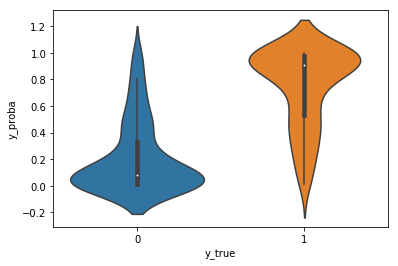

In [156]:
# boxplot
#sns.boxplot(data=results_rf, x='y_true', y='y_proba')
sns.violinplot(data=results_rf, x='y_true', y='y_proba')

For a good classifier both distributions have only a small overlap with each other and the medians should be far away from each other.

### Precision/Recall curves
Next, we want to investigate the precision-recall tradeoff of out model.
Sklearn provides a method which computes precisions and recalls for various threshold values.

In [157]:
from sklearn.metrics import precision_recall_curve

In [158]:
precision, recall, threshold = precision_recall_curve(y_test, y_proba[:,1])

Create a dataframe holding these results.

In [164]:
len(precision)
len(recall)
len(threshold)

78

In [176]:
# Just ecevute

from matplotlib import pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,
                                      color="g", labels=('Precision', 'Recall')):
    '''Functions takes precisions, recalls and thresholds as arguments and generates a plot with two curves.
        Optionally you can define the color and the labels.'''
    plt.plot(thresholds, precisions[:-1], color + "--", label = labels[0])
    plt.plot(thresholds, recalls[:-1], color + "-", label = labels[1])
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    #plt.ylim([0,1])

def plot_precision_vs_recall(precisions, recalls, color="g", label='model'):
    plt.plot(recalls, precisions, color + "--", label = label)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="upper right")
    #plt.ylim([-0.01,1.1])

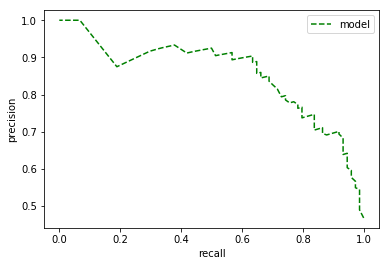

In [174]:
plot_precision_vs_recall(precision, recall)

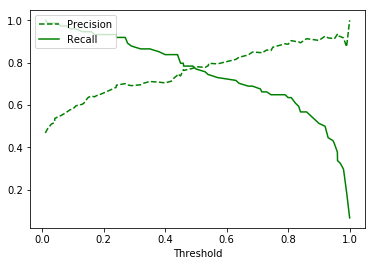

In [175]:
plot_precision_recall_vs_threshold(precision, recall, threshold)

The intersection point of the precision and recall curve is called the breakeven point.

What threshold do we need if we want to have a precision of 0.9? What will be the recall value? (read it of the diagram).

### Feature Importance
In this part we want to compute the feature importance of the random forest. This will be very similar to the feature importance part of the regression exercise. Please perform the following steps:

1. Create a list of features called features by using the columns attribute of X_train and the tolist() method
2. Create a list of the feature importance values by accessing the attribute **feature__importances__** of the random forest 
3. Create a dataframe importance_df containing these two columns
4. Soft the dataframe by the feature importance column in descending order

In [177]:
featues = X_train.columns.tolist()
importances = rf_clf.feature_importances_

In [183]:
importance_df = pd.DataFrame({'features': featues,
                              'importances': importances})\
    .sort_values(by='importances', ascending=False)
importance_df

,features,importances
1,Age,0.228174
2,Fare,0.218795
4,Sex=male,0.179468
3,Familiy_Size,0.075691
0,Pclass,0.070605
9,marital_status=yes,0.062598
8,marital_status=no,0.044256
17,Deck=unknown,0.033431
6,Embarked=S,0.021225
7,Title=rareTitle,0.017027


Surprisingly, the feature Pclass does not seem to be that important as we maybe have thought. Maybhe we have been biased by the movie titanic too much? But wait, what about the feature Fare? It is a numeric feature which describes the price of the ticket. This feature will be correlated with Pclass.

To check if Fare depends on the Pclass please create a boxplot which show the distribution of Fare for the different classes.

**Bonus**: Look at the distribution of Fare for the two different target labels.

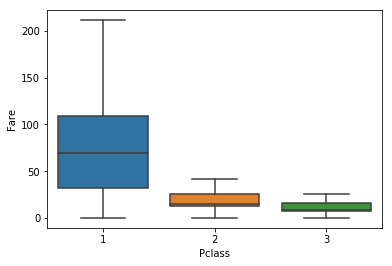

In [181]:
sns.boxplot(data=X_train, x='Pclass', y='Fare', showfliers=False)

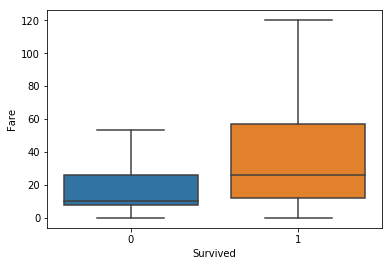

In [187]:
df = X_train.join(y_train)
sns.boxplot(data=df, x='Survived', y='Fare', showfliers=False)

**Bonus**: Can you sum all the values belonging to one categorical variable?

**Hint**:

1. Use apply method and the split function on the column importance_df[features]
2. Use groupby, sum, and sort

In [184]:
# Create new column
importance_df['features_split'] = importance_df['features'].apply(lambda x: x.split('=')[0])

In [186]:
# Compute sum
importance_df.groupby('features_split').sum().sort_values('importances', ascending=False)

,importances
features_split,
Age,0.228174
Fare,0.218795
Sex,0.179468
marital_status,0.106854
Familiy_Size,0.075691
Deck,0.072759
Pclass,0.070605
Embarked,0.030627
Title,0.017027


## K nearest Neighbors Classification

In this part we want to train k nearest neighbors classification model. Since this model uses a distance metric for training, we need to standardize out data. This can be done by using the class StandardScaler from the module sklearn.preprocessing.

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()

In [190]:
columns = X_train.columns.tolist()
train_index = X_train.index.tolist()
test_index = X_test.index.tolist()

In [191]:
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

In [193]:
X_train_scaled = pd.DataFrame(X_train_scaled_array,
                              columns=columns, index=train_index)

X_test_scaled = pd.DataFrame(X_test_scaled_array,
                              columns=columns, index=test_index)

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
knn_clf = KNeighborsClassifier()

In [197]:
knn_clf.fit(X_train_scaled, y_train)
y_pred = knn_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       105
          1       0.74      0.72      0.73        74

avg / total       0.78      0.78      0.78       179



In [198]:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.85      0.79       105
          1       0.73      0.58      0.65        74

avg / total       0.74      0.74      0.73       179



In [199]:
from sklearn.preprocessing import OneHotEncoder

In [208]:
Pclass_train = pd.get_dummies(X_train['Pclass'],
               prefix_sep='=',
               drop_first=True,
               prefix='Pclass')

Pclass_test = pd.get_dummies(X_test['Pclass'],
               prefix_sep='=',
               drop_first=True,
               prefix='Pclass')

In [210]:
X_train_new = X_train.join(Pclass_train).drop(['Pclass'], axis=1)
X_test_new = X_test.join(Pclass_test).drop(['Pclass'], axis=1)

In [211]:
columns = X_train_new.columns.tolist()
train_index = X_train_new.index.tolist()
test_index = X_test_new.index.tolist()

In [212]:
X_train_scaled_array = scaler.fit_transform(X_train_new)
X_test_scaled_array = scaler.transform(X_test_new)

In [213]:
X_train_scaled = pd.DataFrame(X_train_scaled_array,
                              columns=columns, index=train_index)

X_test_scaled = pd.DataFrame(X_test_scaled_array,
                              columns=columns, index=test_index)

In [214]:
knn_clf.fit(X_train_scaled, y_train)
y_pred = knn_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.82      0.82       105
          1       0.74      0.73      0.73        74

avg / total       0.78      0.78      0.78       179



In [215]:
X_train_scaled.describe()

,Age,Fare,Familiy_Size,Sex=male,Embarked=Q,Embarked=S,Title=rareTitle,marital_status=no,marital_status=yes,Deck=B,Deck=C,Deck=D,Deck=E,Deck=F,Deck=G,Deck=T,Deck=unknown,Pclass=2,Pclass=3
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,-3.851476e-17,3.867069e-17,-8.494298e-17,6.517882e-17,-2.114414e-16,-3.227755e-16,1.844654e-16,-8.934800e-17,-3.207484e-16,-1.372186e-16,8.295487e-17,5.289152e-16,1.375304e-16,1.122697e-16,1.165968e-16,-4.442646e-16,-4.802650e-17,-2.869116e-17,-5.738231e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-2.172938e+00,-6.274674e-01,-5.546661e-01,-1.380624e+00,-3.033555e-01,-1.675556e+00,-2.777694e-01,-5.078883e-01,-3.947710e-01,-2.374444e-01,-2.806918e-01,-1.655809e-01,-1.907619e-01,-1.252672e-01,-6.504853e-02,-3.750293e-02,-1.864936e+00,-5.188085e-01,-1.125840e+00
25%,-5.326406e-01,-4.748670e-01,-5.546661e-01,-1.380624e+00,-3.033555e-01,-1.675556e+00,-2.777694e-01,-5.078883e-01,-3.947710e-01,-2.374444e-01,-2.806918e-01,-1.655809e-01,-1.907619e-01,-1.252672e-01,-6.504853e-02,-3.750293e-02,5.362113e-01,-5.188085e-01,-1.125840e+00
50%,-2.286003e-01,-3.491435e-01,-5.546661e-01,7.243102e-01,-3.033555e-01,5.968170e-01,-2.777694e-01,-5.078883e-01,-3.947710e-01,-2.374444e-01,-2.806918e-01,-1.655809e-01,-1.907619e-01,-1.252672e-01,-6.504853e-02,-3.750293e-02,5.362113e-01,-5.188085e-01,8.882256e-01
75%,5.315004e-01,-4.017244e-02,4.009635e-02,7.243102e-01,-3.033555e-01,5.968170e-01,-2.777694e-01,-5.078883e-01,-3.947710e-01,-2.374444e-01,-2.806918e-01,-1.655809e-01,-1.907619e-01,-1.252672e-01,-6.504853e-02,-3.750293e-02,5.362113e-01,-5.188085e-01,8.882256e-01
max,3.875944e+00,9.237724e+00,5.392959e+00,7.243102e-01,3.296463e+00,5.968170e-01,3.600109e+00,1.968937e+00,2.533114e+00,4.211513e+00,3.562627e+00,6.039345e+00,5.242137e+00,7.982936e+00,1.537314e+01,2.666458e+01,5.362113e-01,1.927494e+00,8.882256e-01


In [232]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [218]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [219]:
params = {'n_neighbors': np.arange(1,10)}
params

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [233]:
cv = KFold(random_state=42)

In [234]:
grid_clf = GridSearchCV(knn_clf, params, scoring='f1', cv=cv)

In [235]:
grid_clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [236]:
cf_results = pd.DataFrame(grid_clf.cv_results_)
cf_results

/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002488,0.007181,0.680384,0.980323,1,{'n_neighbors': 1},7,0.713568,0.982659,0.638554,0.983240,0.688889,0.975069,0.001351,0.004141,0.031218,0.003722
1,0.001046,0.003475,0.652217,0.812732,2,{'n_neighbors': 2},9,0.730539,0.825939,0.594203,0.832258,0.631579,0.780000,0.000017,0.000393,0.057555,0.023289
2,0.000929,0.003083,0.741815,0.841462,3,{'n_neighbors': 3},1,0.745946,0.834356,0.716981,0.852273,0.762500,0.837758,0.000079,0.000193,0.018799,0.007769
3,0.000946,0.003219,0.667933,0.782121,4,{'n_neighbors': 4},8,0.674699,0.782609,0.643357,0.800000,0.685714,0.763754,0.000031,0.000103,0.017933,0.014801
4,0.000945,0.003360,0.697192,0.805115,5,{'n_neighbors': 5},3,0.707865,0.802548,0.692308,0.824561,0.691358,0.788235,0.000013,0.000142,0.007573,0.014941
5,0.000995,0.003319,0.692969,0.756765,6,{'n_neighbors': 6},4,0.701754,0.793333,0.671233,0.734824,0.705882,0.742138,0.000068,0.000104,0.015446,0.026029
6,0.000896,0.003593,0.691157,0.773886,7,{'n_neighbors': 7},5,0.711111,0.782334,0.675159,0.788571,0.687117,0.750751,0.000022,0.000220,0.014957,0.016556
7,0.000941,0.003791,0.687600,0.733922,8,{'n_neighbors': 8},6,0.694118,0.743243,0.666667,0.727273,0.701987,0.731250,0.000041,0.000163,0.015131,0.006788
8,0.000954,0.003473,0.714961,0.762316,9,{'n_neighbors': 9},2,0.711864,0.776699,0.716981,0.767045,0.716049,0.743202,0.000082,0.000153,0.002227,0.014078


In [237]:
grid_clf.fit(X_train_scaled, y_train)
y_pred = grid_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       105
          1       0.77      0.76      0.76        74

avg / total       0.80      0.80      0.80       179



### Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
lr_clf = LogisticRegression(random_state=42)

In [238]:
lr_clf.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
lr_clf.fit(X_train_scaled, y_train)
y_pred = lr_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.82      0.82       105
          1       0.75      0.76      0.75        74

avg / total       0.79      0.79      0.79       179



### Optimal Tree size

In [241]:
tree_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [245]:
params = {'max_depth': np.arange(1,15)}

In [246]:
clf_grid = GridSearchCV(tree_clf, cv=cv, param_grid=params)

In [247]:
clf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [249]:
cf_results = pd.DataFrame(clf_grid.cv_results_)
cf_results

/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001035,0.000317,0.787921,0.787925,1,{'max_depth': 1},8,0.777311,0.793249,0.784810,0.789474,0.801688,0.781053,0.000229,4.457443e-05,0.010195,0.005098
1,0.000946,0.000274,0.793539,0.801269,2,{'max_depth': 2},4,0.789916,0.808017,0.793249,0.791579,0.797468,0.804211,0.000102,4.673383e-06,0.003091,0.007026
2,0.000980,0.000325,0.813202,0.835678,3,{'max_depth': 3},1,0.798319,0.841772,0.818565,0.829474,0.822785,0.835789,0.000051,7.575919e-05,0.010686,0.005021
3,0.001218,0.000303,0.801966,0.844810,4,{'max_depth': 4},2,0.789916,0.854430,0.801688,0.835789,0.814346,0.844211,0.000115,3.394822e-05,0.009979,0.007622
4,0.001311,0.000277,0.796348,0.864473,5,{'max_depth': 5},3,0.777311,0.873418,0.805907,0.871579,0.805907,0.848421,0.000190,2.202072e-05,0.013490,0.011375
5,0.001099,0.000251,0.789326,0.883435,6,{'max_depth': 6},7,0.768908,0.894515,0.793249,0.892632,0.805907,0.863158,0.000068,1.730247e-06,0.015362,0.014358
6,0.001193,0.000281,0.793539,0.904502,7,{'max_depth': 7},4,0.781513,0.915612,0.805907,0.915789,0.793249,0.882105,0.000041,2.397052e-05,0.009965,0.015837
7,0.001270,0.000261,0.790730,0.914330,8,{'max_depth': 8},6,0.777311,0.919831,0.793249,0.932632,0.801688,0.890526,0.000127,1.012336e-05,0.010113,0.017624
8,0.001296,0.000275,0.775281,0.933991,9,{'max_depth': 9},12,0.768908,0.936709,0.797468,0.951579,0.759494,0.913684,0.000104,2.154081e-05,0.016137,0.015589
9,0.001417,0.000316,0.773876,0.950141,10,{'max_depth': 10},13,0.764706,0.951477,0.793249,0.955789,0.763713,0.943158,0.000089,1.445052e-05,0.013690,0.005243


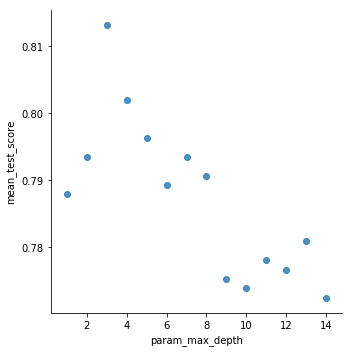

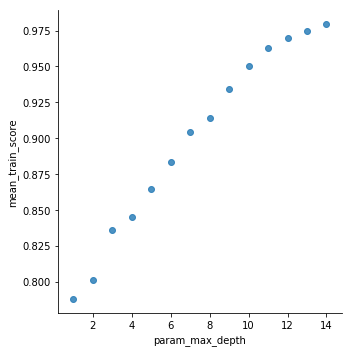

In [253]:
sns.lmplot(data=cf_results, x='param_max_depth',
           y='mean_test_score', fit_reg=False)
sns.lmplot(data=cf_results, x='param_max_depth',
           y='mean_train_score', fit_reg=False)

### pca and knn

In [254]:
from sklearn.decomposition import PCA

In [255]:
pca = PCA(n_components=2)

In [273]:
pca_df = pd.DataFrame(pca.fit_transform(X_train_scaled), index=train_index)
pca_df.head()

pca_df_test = pd.DataFrame(pca.transform(X_test_scaled), index=test_index)
pca_df_test.head()

,0,1
709,-1.323172,0.200469
439,-0.318874,-1.800677
840,-1.526634,-0.535651
720,0.108088,1.304567
39,-0.804418,2.770798


In [262]:
df = pca_df.join(y_train)

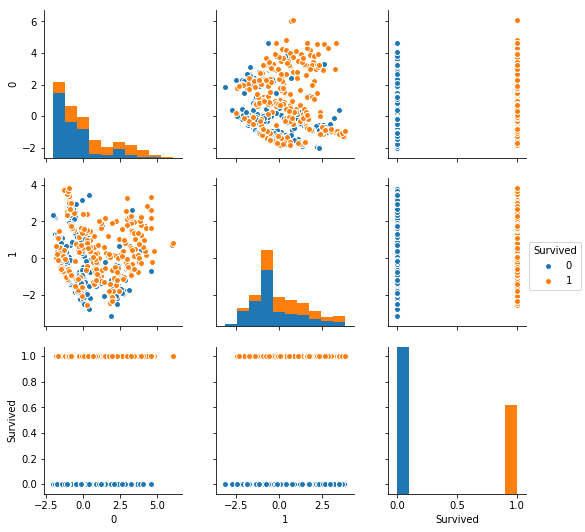

In [265]:
sns.pairplot(df, hue='Survived')

In [266]:
knn_clf.fit(pca_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [267]:
from mlxtend.plotting import plot_decision_regions

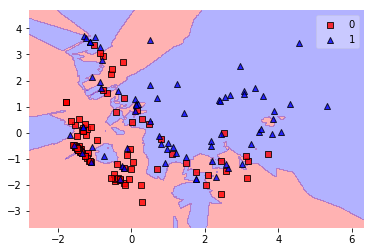

In [275]:
plot_decision_regions(pca_df_test.values, y_test.values, knn_clf)

In [276]:
knn_clf.score(pca_df_test, y_test)

0.7877094972067039